In [1]:
import os
import pandas as pd
hbn_path = "/home/ryan/Code/DMZ/hbn.csv"

### 1. The HBN column names are malformed, making csv parsing software fail or return nonsensical results

Whenever a malformed column name exists, e.g. "BIA,""Days_Baseline"", this column has all nan values and there exists another column which is correctly formed, e.g. "BIA,Days_Baseline" which has the true values.

In [15]:
with open(hbn_path, "r") as f:
    columns = f.readline()
    print('Correctly formed, "Instrument,Variable"')
    print(columns[:40], '\n')
    print('Incorrectly formed, "Instrument,""Variable""')
    print(columns[6571:8100])

Correctly formed, "Instrument,Variable"
"Identifiers","ACE,ACE_01","ACE,ACE_02", 

Incorrectly formed, "Instrument,""Variable""
"Audit,AUDIT_09","Audit,AUDIT_10","Audit,AUDIT_Total_Score","Audit,Administration","Audit,Comment_ID","Audit,Data_entry","Audit,Days_Baseline","Audit,EID","Audit,PSCID","Audit,START_DATE","Audit,Season","Audit,Site","Audit,Study","Audit,Visit_label","Audit,Year","Audit,﻿EID","BIA,""Activity_Level"","BIA,""Age"","BIA,""BMC"","BIA,""BMI"","BIA,""BMR"","BIA,""DEE"","BIA,""Days_Baseline"","BIA,""ECW"","BIA,""EID"","BIA,""FFM"","BIA,""FFMI"","BIA,""FMI"","BIA,""Fat"","BIA,""Frame"","BIA,""Height"","BIA,""ICW"","BIA,""LDM"","BIA,""LST"","BIA,""SMM"","BIA,""START_DATE"","BIA,""Season"","BIA,""Sex"","BIA,""Study"","BIA,""Study_Site"","BIA,""TBW"","BIA,""Weight"","BIA,""Year"","BIA,Administration","BIA,Comment_ID","BIA,Data_entry","BIA,Days_Baseline","BIA,EID","BIA,PSCID","BIA,START_DATE","BIA,Season","BIA,Site","BIA,Study","BIA,Visit_label","BIA,Year","Barratt,Adminis

To fix:
1. Parse .csv, but with "," used as a delimeter rather than just ,
2. Remove the first character from the first column name, and the last character from the last column name
2. Remove all columns which have a " character in the column name

In [3]:
hbn = pd.read_csv(hbn_path, engine='python',
                  dtype="unicode", sep = '","')
columns = list(hbn.columns)
columns[0] = columns[0][1:]
columns[-1] = columns[-1][:-1]
hbn.columns = columns
keep_columns = list(filter(lambda x: '"' not in x, hbn.columns))
hbn = hbn[keep_columns]

### 2. More than one unique delimter for a NA value. e.g. here, '.' and 'nan' are used. In other instances, 'n/a' is also used

In [4]:
import numpy as np
print(np.unique(hbn["NLES_SR,NLES_SR_Upset_Avg"].as_matrix()))

['.' '0' '0.67' '1' '1.2' '1.33' '1.4' '1.5' '1.6' '1.67' '1.71' '1.75' '2'
 '2.07' '2.11' '2.17' '2.2' '2.22' '2.25' '2.27' '2.29' '2.33' '2.37E+11'
 '2.4' '2.43' '2.5' '2.57' '2.6' '2.62' '2.64' '2.67' '2.7' '2.71' '2.75'
 '2.78' '2.8' '2.83' '2.87' '2.88' '2.89' '2.9' '3' '3.1' '3.13' '3.17'
 '3.2' '3.22' '3.25' '3.33' '3.38' '3.4' '3.45' '3.5' '3.55' '3.56' '3.57'
 '3.6' '3.63' '3.67' '3.7' '3.71' '3.75' '3.77' '3.8' '3.86' '4' '4.08'
 '4.11' '4.17' '4.18' '4.2' '4.25' '4.33' '4.38' '4.43' '4.45' '4.5' '4.6'
 '4.7' '5' '5.75' '6.14E+13' 'nan']


To fix:
1. Replace all instances of '.', 'nan', 'NaN', 'NA', 'n/a' in the data frame with one value (here, we use a special value in numpy called np.nan)

In [5]:
for c in hbn.columns:
    if "." in hbn[c].as_matrix():
        print(". in", c)
    if "n/a" in hbn[c].as_matrix():
        print("n/a in", c)
    if "nan" in hbn[c].as_matrix():
        print("nan in", c)

. in ACE,ACE_01
. in ACE,ACE_02
. in ACE,ACE_03
. in ACE,ACE_04
. in ACE,ACE_05
. in ACE,ACE_06
. in ACE,ACE_07
. in ACE,ACE_08
. in ACE,ACE_09
. in ACE,ACE_10
. in ACE,ACE_Score
. in ACE,Administration
. in ACE,Comment_ID
nan in ACE,Comment_ID
. in ACE,Data_entry
. in ACE,Days_Baseline
. in ACE,EID
nan in ACE,EID
. in ACE,PSCID
nan in ACE,PSCID
. in ACE,START_DATE
. in ACE,Season
. in ACE,Site
. in ACE,Study
. in ACE,Visit_label
nan in ACE,Visit_label
. in ACE,Year
. in ACE,﻿EID
. in APQ_P,APQ_P_01
. in APQ_P,APQ_P_02
nan in APQ_P,APQ_P_02
. in APQ_P,APQ_P_03
. in APQ_P,APQ_P_04
nan in APQ_P,APQ_P_04
. in APQ_P,APQ_P_05
. in APQ_P,APQ_P_06
nan in APQ_P,APQ_P_06
. in APQ_P,APQ_P_07
. in APQ_P,APQ_P_08
nan in APQ_P,APQ_P_08
. in APQ_P,APQ_P_09
nan in APQ_P,APQ_P_09
. in APQ_P,APQ_P_10
nan in APQ_P,APQ_P_10
. in APQ_P,APQ_P_11
nan in APQ_P,APQ_P_11
. in APQ_P,APQ_P_12
nan in APQ_P,APQ_P_12
. in APQ_P,APQ_P_13
. in APQ_P,APQ_P_14
nan in APQ_P,APQ_P_14
. in APQ_P,APQ_P_15
nan in APQ_P,APQ_

. in ASR,ASR_AD_T
. in ASR,ASR_AP
. in ASR,ASR_AP_T
. in ASR,ASR_C
. in ASR,ASR_Ext
. in ASR,ASR_Ext_T
. in ASR,ASR_Int
. in ASR,ASR_Int_T
. in ASR,ASR_Intrusive
. in ASR,ASR_Intrusive_T
. in ASR,ASR_OP
. in ASR,ASR_RBB
. in ASR,ASR_RBB_T
. in ASR,ASR_SC
. in ASR,ASR_SC_T
. in ASR,ASR_TP
. in ASR,ASR_TP_T
. in ASR,ASR_Total
. in ASR,ASR_Total_T
. in ASR,ASR_WD
. in ASR,ASR_WD_T
. in ASR,Administration
. in ASR,Comment_ID
nan in ASR,Comment_ID
. in ASR,Data_entry
. in ASR,Days_Baseline
. in ASR,EID
nan in ASR,EID
. in ASR,PSCID
nan in ASR,PSCID
. in ASR,START_DATE
. in ASR,Season
. in ASR,Site
. in ASR,Study
. in ASR,Visit_label
nan in ASR,Visit_label
. in ASR,Year
. in ASR,﻿EID
. in ASSQ,ASSQ_01
. in ASSQ,ASSQ_02
nan in ASSQ,ASSQ_02
. in ASSQ,ASSQ_03
nan in ASSQ,ASSQ_03
. in ASSQ,ASSQ_04
nan in ASSQ,ASSQ_04
. in ASSQ,ASSQ_05
. in ASSQ,ASSQ_06
. in ASSQ,ASSQ_07
. in ASSQ,ASSQ_08
nan in ASSQ,ASSQ_08
. in ASSQ,ASSQ_09
nan in ASSQ,ASSQ_09
. in ASSQ,ASSQ_10
nan in ASSQ,ASSQ_10
. in ASSQ,ASS

. in CBCL,CBCL_TP
. in CBCL,CBCL_TP_T
. in CBCL,CBCL_Total
. in CBCL,CBCL_Total_T
. in CBCL,CBCL_WD
. in CBCL,CBCL_WD_T
. in CBCL,Comment_ID
nan in CBCL,Comment_ID
. in CBCL,Data_entry
. in CBCL,Days_Baseline
. in CBCL,EID
nan in CBCL,EID
. in CBCL,PSCID
nan in CBCL,PSCID
. in CBCL,START_DATE
nan in CBCL,START_DATE
. in CBCL,Season
. in CBCL,Site
. in CBCL,Study
. in CBCL,Visit_label
nan in CBCL,Visit_label
. in CBCL,Year
. in CBCL,﻿EID
. in CBCL_Pre,Administration
. in CBCL_Pre,CBCLPre_AB
. in CBCL_Pre,CBCLPre_AB_T
. in CBCL_Pre,CBCLPre_AD
. in CBCL_Pre,CBCLPre_AD_T
. in CBCL_Pre,CBCLPre_AP
. in CBCL_Pre,CBCLPre_AP_T
. in CBCL_Pre,CBCLPre_DSM_ADHP
. in CBCL_Pre,CBCLPre_DSM_ADHP_T
. in CBCL_Pre,CBCLPre_DSM_AP
. in CBCL_Pre,CBCLPre_DSM_AP_T
. in CBCL_Pre,CBCLPre_DSM_AnxP
. in CBCL_Pre,CBCLPre_DSM_AnxP_T
. in CBCL_Pre,CBCLPre_DSM_ODP
. in CBCL_Pre,CBCLPre_DSM_ODP_T
. in CBCL_Pre,CBCLPre_DSM_PDP
. in CBCL_Pre,CBCLPre_DSM_PDP_T
. in CBCL_Pre,CBCLPre_Ext
. in CBCL_Pre,CBCLPre_Ext_T
. in CBC

nan in CELF5_Meta,PSCID
. in CELF5_Meta,START_DATE
. in CELF5_Meta,Season
. in CELF5_Meta,Site
. in CELF5_Meta,Study
. in CELF5_Meta,Visit_label
nan in CELF5_Meta,Visit_label
. in CELF5_Meta,Year
. in CELF_Full_5to8,Administration
. in CELF_Full_5to8,CELF_CLS_P
nan in CELF_Full_5to8,CELF_CLS_P
. in CELF_Full_5to8,CELF_CLS_Stnd
nan in CELF_Full_5to8,CELF_CLS_Stnd
. in CELF_Full_5to8,CELF_Complete
. in CELF_Full_5to8,CELF_ELI_P
nan in CELF_Full_5to8,CELF_ELI_P
. in CELF_Full_5to8,CELF_ELI_Stnd
nan in CELF_Full_5to8,CELF_ELI_Stnd
. in CELF_Full_5to8,CELF_FD_P
nan in CELF_Full_5to8,CELF_FD_P
. in CELF_Full_5to8,CELF_FD_R
nan in CELF_Full_5to8,CELF_FD_R
. in CELF_Full_5to8,CELF_FD_S
nan in CELF_Full_5to8,CELF_FD_S
. in CELF_Full_5to8,CELF_FS_P
nan in CELF_Full_5to8,CELF_FS_P
. in CELF_Full_5to8,CELF_FS_R
nan in CELF_Full_5to8,CELF_FS_R
. in CELF_Full_5to8,CELF_FS_S
nan in CELF_Full_5to8,CELF_FS_S
. in CELF_Full_5to8,CELF_Inc_Reason
nan in CELF_Full_5to8,CELF_Inc_Reason
. in CELF_Full_5to8,C

. in CPIC,CPIC_32
nan in CPIC,CPIC_32
. in CPIC,CPIC_33
nan in CPIC,CPIC_33
. in CPIC,CPIC_34
nan in CPIC,CPIC_34
. in CPIC,CPIC_35
nan in CPIC,CPIC_35
. in CPIC,CPIC_36
nan in CPIC,CPIC_36
. in CPIC,CPIC_37
nan in CPIC,CPIC_37
. in CPIC,CPIC_38
nan in CPIC,CPIC_38
. in CPIC,CPIC_39
nan in CPIC,CPIC_39
. in CPIC,CPIC_40
nan in CPIC,CPIC_40
. in CPIC,CPIC_41
nan in CPIC,CPIC_41
. in CPIC,CPIC_42
nan in CPIC,CPIC_42
. in CPIC,CPIC_43
nan in CPIC,CPIC_43
. in CPIC,CPIC_44
nan in CPIC,CPIC_44
. in CPIC,CPIC_45
nan in CPIC,CPIC_45
. in CPIC,CPIC_46
nan in CPIC,CPIC_46
. in CPIC,CPIC_47
nan in CPIC,CPIC_47
. in CPIC,CPIC_48
nan in CPIC,CPIC_48
. in CPIC,CPIC_49
nan in CPIC,CPIC_49
. in CPIC,CPIC_50
nan in CPIC,CPIC_50
. in CPIC,CPIC_51
nan in CPIC,CPIC_51
. in CPIC,CPIC_Content_Total
. in CPIC,CPIC_Frequency_Total
. in CPIC,CPIC_Intensity_Total
. in CPIC,CPIC_Perceived_Threat_Total
. in CPIC,CPIC_Resolution_Total
. in CPIC,CPIC_Self_Blame_Total
. in CPIC,CPIC_Stability_Total
. in CPIC,CPIC_T

. in DSM5_Dx,DX_01_Code
. in DSM5_Dx,DX_01_New
. in DSM5_Dx,DX_01_PRem
. in DSM5_Dx,DX_01_RC
. in DSM5_Dx,DX_01_Rem
. in DSM5_Dx,DX_01_RuleOut
. in DSM5_Dx,DX_01_Spec
. in DSM5_Dx,DX_01_Sub
. in DSM5_Dx,DX_02
. in DSM5_Dx,DX_02_ByHx
. in DSM5_Dx,DX_02_Cat
. in DSM5_Dx,DX_02_Code
. in DSM5_Dx,DX_02_New
. in DSM5_Dx,DX_02_PRem
. in DSM5_Dx,DX_02_RC
. in DSM5_Dx,DX_02_Rem
. in DSM5_Dx,DX_02_RuleOut
. in DSM5_Dx,DX_02_Spec
. in DSM5_Dx,DX_02_Sub
. in DSM5_Dx,DX_03
. in DSM5_Dx,DX_03_ByHx
. in DSM5_Dx,DX_03_Cat
. in DSM5_Dx,DX_03_Code
. in DSM5_Dx,DX_03_New
. in DSM5_Dx,DX_03_PRem
. in DSM5_Dx,DX_03_RC
. in DSM5_Dx,DX_03_Rem
. in DSM5_Dx,DX_03_RuleOut
. in DSM5_Dx,DX_03_Spec
. in DSM5_Dx,DX_03_Sub
. in DSM5_Dx,DX_04
. in DSM5_Dx,DX_04_ByHx
. in DSM5_Dx,DX_04_Cat
. in DSM5_Dx,DX_04_Code
. in DSM5_Dx,DX_04_New
. in DSM5_Dx,DX_04_PRem
. in DSM5_Dx,DX_04_RC
. in DSM5_Dx,DX_04_Rem
. in DSM5_Dx,DX_04_RuleOut
. in DSM5_Dx,DX_04_Spec
. in DSM5_Dx,DX_04_Sub
. in DSM5_Dx,DX_05
. in DSM5_Dx,DX_05_ByHx

nan in EEG_Track,EEG4_crash
. in EEG_Track,EEG5_abb
nan in EEG_Track,EEG5_abb
. in EEG_Track,EEG5_behav
nan in EEG_Track,EEG5_behav
. in EEG_Track,EEG5_crash
nan in EEG_Track,EEG5_crash
. in EEG_Track,EEG6_abb
nan in EEG_Track,EEG6_abb
. in EEG_Track,EEG6_behav
nan in EEG_Track,EEG6_behav
. in EEG_Track,EEG6_crash
nan in EEG_Track,EEG6_crash
. in EEG_Track,EEG7_abb
nan in EEG_Track,EEG7_abb
. in EEG_Track,EEG7_behav
nan in EEG_Track,EEG7_behav
. in EEG_Track,EEG7_crash
nan in EEG_Track,EEG7_crash
. in EEG_Track,EEG8_abb
nan in EEG_Track,EEG8_abb
. in EEG_Track,EEG8_behav
nan in EEG_Track,EEG8_behav
. in EEG_Track,EEG8_crash
nan in EEG_Track,EEG8_crash
. in EEG_Track,EEG9_abb
nan in EEG_Track,EEG9_abb
. in EEG_Track,EEG9_behav
nan in EEG_Track,EEG9_behav
. in EEG_Track,EEG9_crash
nan in EEG_Track,EEG9_crash
. in EEG_Track,EEG_1
nan in EEG_Track,EEG_1
. in EEG_Track,EEG_10
nan in EEG_Track,EEG_10
. in EEG_Track,EEG_11
nan in EEG_Track,EEG_11
. in EEG_Track,EEG_12
nan in EEG_Track,EEG_12


. in ESPAD,ESPAD_05w
nan in ESPAD,ESPAD_05w
. in ESPAD,ESPAD_05x
nan in ESPAD,ESPAD_05x
. in ESPAD,ESPAD_05y
nan in ESPAD,ESPAD_05y
. in ESPAD,ESPAD_06a
. in ESPAD,ESPAD_06b
nan in ESPAD,ESPAD_06b
. in ESPAD,ESPAD_06c
nan in ESPAD,ESPAD_06c
. in ESPAD,ESPAD_06d
nan in ESPAD,ESPAD_06d
. in ESPAD,ESPAD_06e
nan in ESPAD,ESPAD_06e
. in ESPAD,ESPAD_06f
nan in ESPAD,ESPAD_06f
. in ESPAD,ESPAD_06g
nan in ESPAD,ESPAD_06g
. in ESPAD,ESPAD_06h
nan in ESPAD,ESPAD_06h
. in ESPAD,ESPAD_06i
nan in ESPAD,ESPAD_06i
. in ESPAD,ESPAD_06j
nan in ESPAD,ESPAD_06j
. in ESPAD,ESPAD_06k
nan in ESPAD,ESPAD_06k
. in ESPAD,ESPAD_06l
nan in ESPAD,ESPAD_06l
. in ESPAD,ESPAD_06m
nan in ESPAD,ESPAD_06m
. in ESPAD,ESPAD_06n
nan in ESPAD,ESPAD_06n
. in ESPAD,ESPAD_06o
nan in ESPAD,ESPAD_06o
. in ESPAD,ESPAD_06p
nan in ESPAD,ESPAD_06p
. in ESPAD,ESPAD_06q
nan in ESPAD,ESPAD_06q
. in ESPAD,ESPAD_06r
nan in ESPAD,ESPAD_06r
. in ESPAD,ESPAD_06s
nan in ESPAD,ESPAD_06s
. in ESPAD,ESPAD_06t
nan in ESPAD,ESPAD_06t
. in ESPAD,

nan in ESWAN,Panic_B12
. in ESWAN,Panic_B13
nan in ESWAN,Panic_B13
. in ESWAN,START_DATE
. in ESWAN,Season
. in ESWAN,Site
. in ESWAN,SocAnx_01
. in ESWAN,SocAnx_02
. in ESWAN,SocAnx_03
. in ESWAN,SocAnx_04A
nan in ESWAN,SocAnx_04A
. in ESWAN,SocAnx_04B
. in ESWAN,SocAnx_05
. in ESWAN,Study
. in ESWAN,Visit_label
nan in ESWAN,Visit_label
. in ESWAN,Year
. in ESWAN,﻿EID
. in EVT,Administration
. in EVT,Comment_ID
nan in EVT,Comment_ID
. in EVT,Data_entry
. in EVT,Days_Baseline
. in EVT,EID
nan in EVT,EID
. in EVT,EVT2_Percentile
nan in EVT,EVT2_Percentile
. in EVT,EVT2_RawScore
nan in EVT,EVT2_RawScore
. in EVT,EVT2_StandardScore
nan in EVT,EVT2_StandardScore
. in EVT,EVT_Complete
. in EVT,EVT_IncompleteReason
nan in EVT,EVT_IncompleteReason
. in EVT,EVT_Invalid_Reason
nan in EVT,EVT_Invalid_Reason
. in EVT,EVT_Valid
nan in EVT,EVT_Valid
. in EVT,EVT_Valid_Possible
nan in EVT,EVT_Valid_Possible
. in EVT,PSCID
nan in EVT,PSCID
. in EVT,START_DATE
. in EVT,Season
. in EVT,Site
. in EVT,St

. in MFQ_SR,MFQ_SR_18
. in MFQ_SR,MFQ_SR_19
. in MFQ_SR,MFQ_SR_20
. in MFQ_SR,MFQ_SR_21
nan in MFQ_SR,MFQ_SR_21
. in MFQ_SR,MFQ_SR_22
. in MFQ_SR,MFQ_SR_23
. in MFQ_SR,MFQ_SR_24
. in MFQ_SR,MFQ_SR_25
. in MFQ_SR,MFQ_SR_26
. in MFQ_SR,MFQ_SR_27
. in MFQ_SR,MFQ_SR_28
. in MFQ_SR,MFQ_SR_29
. in MFQ_SR,MFQ_SR_30
. in MFQ_SR,MFQ_SR_31
. in MFQ_SR,MFQ_SR_32
. in MFQ_SR,MFQ_SR_33
. in MFQ_SR,MFQ_SR_Total
. in MFQ_SR,PSCID
nan in MFQ_SR,PSCID
. in MFQ_SR,START_DATE
. in MFQ_SR,Season
. in MFQ_SR,Site
. in MFQ_SR,Study
. in MFQ_SR,Visit_label
nan in MFQ_SR,Visit_label
. in MFQ_SR,Year
. in MFQ_SR,﻿EID
. in MRI_Track,Administration
. in MRI_Track,Comment_ID
nan in MRI_Track,Comment_ID
. in MRI_Track,Complete
. in MRI_Track,DKI64
nan in MRI_Track,DKI64
. in MRI_Track,DWI_APAX
nan in MRI_Track,DWI_APAX
. in MRI_Track,DWI_PAAX
nan in MRI_Track,DWI_PAAX
. in MRI_Track,Data_entry
. in MRI_Track,Days_Baseline
nan in MRI_Track,Days_Baseline
. in MRI_Track,EID
nan in MRI_Track,EID
. in MRI_Track,MT_OFF


nan in NLES_P,NLES_P_09b
. in NLES_P,NLES_P_09c
nan in NLES_P,NLES_P_09c
. in NLES_P,NLES_P_10a
nan in NLES_P,NLES_P_10a
. in NLES_P,NLES_P_10b
nan in NLES_P,NLES_P_10b
. in NLES_P,NLES_P_10c
nan in NLES_P,NLES_P_10c
. in NLES_P,NLES_P_11a
nan in NLES_P,NLES_P_11a
. in NLES_P,NLES_P_11b
nan in NLES_P,NLES_P_11b
. in NLES_P,NLES_P_11c
nan in NLES_P,NLES_P_11c
. in NLES_P,NLES_P_12a
nan in NLES_P,NLES_P_12a
. in NLES_P,NLES_P_12b
nan in NLES_P,NLES_P_12b
. in NLES_P,NLES_P_12c
nan in NLES_P,NLES_P_12c
. in NLES_P,NLES_P_13a
. in NLES_P,NLES_P_13b
nan in NLES_P,NLES_P_13b
. in NLES_P,NLES_P_13c
nan in NLES_P,NLES_P_13c
. in NLES_P,NLES_P_14a
. in NLES_P,NLES_P_14b
nan in NLES_P,NLES_P_14b
. in NLES_P,NLES_P_14c
nan in NLES_P,NLES_P_14c
. in NLES_P,NLES_P_15a
. in NLES_P,NLES_P_15b
nan in NLES_P,NLES_P_15b
. in NLES_P,NLES_P_15c
nan in NLES_P,NLES_P_15c
. in NLES_P,NLES_P_16a
. in NLES_P,NLES_P_16b
nan in NLES_P,NLES_P_16b
. in NLES_P,NLES_P_16c
nan in NLES_P,NLES_P_16c
. in NLES_P,NLES_P_

. in PCIAT,PCIAT_03
nan in PCIAT,PCIAT_03
. in PCIAT,PCIAT_04
nan in PCIAT,PCIAT_04
. in PCIAT,PCIAT_05
nan in PCIAT,PCIAT_05
. in PCIAT,PCIAT_06
nan in PCIAT,PCIAT_06
. in PCIAT,PCIAT_07
nan in PCIAT,PCIAT_07
. in PCIAT,PCIAT_08
nan in PCIAT,PCIAT_08
. in PCIAT,PCIAT_09
nan in PCIAT,PCIAT_09
. in PCIAT,PCIAT_10
nan in PCIAT,PCIAT_10
. in PCIAT,PCIAT_11
. in PCIAT,PCIAT_12
. in PCIAT,PCIAT_13
. in PCIAT,PCIAT_14
. in PCIAT,PCIAT_15
. in PCIAT,PCIAT_16
. in PCIAT,PCIAT_17
nan in PCIAT,PCIAT_17
. in PCIAT,PCIAT_18
nan in PCIAT,PCIAT_18
. in PCIAT,PCIAT_19
. in PCIAT,PCIAT_20
. in PCIAT,PCIAT_Total
. in PCIAT,PSCID
nan in PCIAT,PSCID
. in PCIAT,START_DATE
. in PCIAT,Season
. in PCIAT,Site
. in PCIAT,Study
. in PCIAT,Visit_label
nan in PCIAT,Visit_label
. in PCIAT,Year
. in PCIAT,﻿EID
. in PPS,Administration
. in PPS,Comment_ID
nan in PPS,Comment_ID
. in PPS,Data_entry
. in PPS,Days_Baseline
. in PPS,EID
nan in PPS,EID
. in PPS,PPS_F_01
nan in PPS,PPS_F_01
. in PPS,PPS_F_02
nan in PPS,PPS_

. in PreInt_Demos_Home,nonfam_05_relation
nan in PreInt_Demos_Home,nonfam_05_relation
. in PreInt_Demos_Home,nonfam_06_age
nan in PreInt_Demos_Home,nonfam_06_age
. in PreInt_Demos_Home,nonfam_06_quality
nan in PreInt_Demos_Home,nonfam_06_quality
. in PreInt_Demos_Home,nonfam_06_relation
nan in PreInt_Demos_Home,nonfam_06_relation
. in PreInt_Demos_Home,﻿EID
. in PreInt_DevHx,Administration
. in PreInt_DevHx,Comment_ID
nan in PreInt_DevHx,Comment_ID
. in PreInt_DevHx,Data_entry
. in PreInt_DevHx,Days_Baseline
. in PreInt_DevHx,EID
nan in PreInt_DevHx,EID
. in PreInt_DevHx,PSCID
nan in PreInt_DevHx,PSCID
. in PreInt_DevHx,START_DATE
. in PreInt_DevHx,Season
. in PreInt_DevHx,Site
. in PreInt_DevHx,Study
. in PreInt_DevHx,Visit_label
nan in PreInt_DevHx,Visit_label
. in PreInt_DevHx,Year
. in PreInt_DevHx,apgar1
nan in PreInt_DevHx,apgar1
. in PreInt_DevHx,apgar5
nan in PreInt_DevHx,apgar5
. in PreInt_DevHx,birthweight_lbs
nan in PreInt_DevHx,birthweight_lbs
. in PreInt_DevHx,birthweight_

. in PreInt_FamHx,f_can
. in PreInt_FamHx,f_chickenpox
nan in PreInt_FamHx,f_chickenpox
. in PreInt_FamHx,f_cocaine
. in PreInt_FamHx,f_constip
nan in PreInt_FamHx,f_constip
. in PreInt_FamHx,f_coronary
nan in PreInt_FamHx,f_coronary
. in PreInt_FamHx,f_cysfib
nan in PreInt_FamHx,f_cysfib
. in PreInt_FamHx,f_deaf
nan in PreInt_FamHx,f_deaf
. in PreInt_FamHx,f_dep
. in PreInt_FamHx,f_derm_other
nan in PreInt_FamHx,f_derm_other
. in PreInt_FamHx,f_diabetes_t1
nan in PreInt_FamHx,f_diabetes_t1
. in PreInt_FamHx,f_diabetes_t2
nan in PreInt_FamHx,f_diabetes_t2
. in PreInt_FamHx,f_diarrhea
nan in PreInt_FamHx,f_diarrhea
. in PreInt_FamHx,f_drug_abuse
nan in PreInt_FamHx,f_drug_abuse
. in PreInt_FamHx,f_eczema
nan in PreInt_FamHx,f_eczema
. in PreInt_FamHx,f_enco
nan in PreInt_FamHx,f_enco
. in PreInt_FamHx,f_endo_other
nan in PreInt_FamHx,f_endo_other
. in PreInt_FamHx,f_ent_other
nan in PreInt_FamHx,f_ent_other
. in PreInt_FamHx,f_enuresis
nan in PreInt_FamHx,f_enuresis
. in PreInt_FamHx,f_

nan in PreInt_FamHx,p_coronary
. in PreInt_FamHx,p_cysfib
nan in PreInt_FamHx,p_cysfib
. in PreInt_FamHx,p_deaf
nan in PreInt_FamHx,p_deaf
. in PreInt_FamHx,p_dep
. in PreInt_FamHx,p_derm_other
nan in PreInt_FamHx,p_derm_other
. in PreInt_FamHx,p_diabetes_t1
nan in PreInt_FamHx,p_diabetes_t1
. in PreInt_FamHx,p_diabetes_t2
nan in PreInt_FamHx,p_diabetes_t2
. in PreInt_FamHx,p_diarrhea
nan in PreInt_FamHx,p_diarrhea
. in PreInt_FamHx,p_drug_abuse
nan in PreInt_FamHx,p_drug_abuse
. in PreInt_FamHx,p_eczema
nan in PreInt_FamHx,p_eczema
. in PreInt_FamHx,p_enco
nan in PreInt_FamHx,p_enco
. in PreInt_FamHx,p_endo_other
nan in PreInt_FamHx,p_endo_other
. in PreInt_FamHx,p_ent_other
nan in PreInt_FamHx,p_ent_other
. in PreInt_FamHx,p_enuresis
nan in PreInt_FamHx,p_enuresis
. in PreInt_FamHx,p_foodallergy
nan in PreInt_FamHx,p_foodallergy
. in PreInt_FamHx,p_gastro
nan in PreInt_FamHx,p_gastro
. in PreInt_FamHx,p_genito_other
nan in PreInt_FamHx,p_genito_other
. in PreInt_FamHx,p_glasses
nan i

nan in PreInt_FamHx_RDC,mfage
. in PreInt_FamHx_RDC,mfalive
nan in PreInt_FamHx_RDC,mfalive
. in PreInt_FamHx_RDC,mfdk
nan in PreInt_FamHx_RDC,mfdk
. in PreInt_FamHx_RDC,mff_range
nan in PreInt_FamHx_RDC,mff_range
. in PreInt_FamHx_RDC,mffage
nan in PreInt_FamHx_RDC,mffage
. in PreInt_FamHx_RDC,mffalive
nan in PreInt_FamHx_RDC,mffalive
. in PreInt_FamHx_RDC,mffdk
nan in PreInt_FamHx_RDC,mffdk
. in PreInt_FamHx_RDC,mfhxanx
nan in PreInt_FamHx_RDC,mfhxanx
. in PreInt_FamHx_RDC,mfhxautism
nan in PreInt_FamHx_RDC,mfhxautism
. in PreInt_FamHx_RDC,mfhxbp
nan in PreInt_FamHx_RDC,mfhxbp
. in PreInt_FamHx_RDC,mfhxdep
nan in PreInt_FamHx_RDC,mfhxdep
. in PreInt_FamHx_RDC,mfhxdrg
nan in PreInt_FamHx_RDC,mfhxdrg
. in PreInt_FamHx_RDC,mfhxfirstbp
nan in PreInt_FamHx_RDC,mfhxfirstbp
. in PreInt_FamHx_RDC,mfhxfirstdp
nan in PreInt_FamHx_RDC,mfhxfirstdp
. in PreInt_FamHx_RDC,mfhxfirstno
nan in PreInt_FamHx_RDC,mfhxfirstno
. in PreInt_FamHx_RDC,mfhxfirstsc
nan in PreInt_FamHx_RDC,mfhxfirstsc
. in PreIn

nan in PreInt_FamHx_RDC,sib3migrain
. in PreInt_FamHx_RDC,sib3neurol
nan in PreInt_FamHx_RDC,sib3neurol
. in PreInt_FamHx_RDC,sib3onset
nan in PreInt_FamHx_RDC,sib3onset
. in PreInt_FamHx_RDC,sib3thyroid
nan in PreInt_FamHx_RDC,sib3thyroid
. in PreInt_FamHx_RDC,sib4arthrit
nan in PreInt_FamHx_RDC,sib4arthrit
. in PreInt_FamHx_RDC,sib4asthma
nan in PreInt_FamHx_RDC,sib4asthma
. in PreInt_FamHx_RDC,sib4attempts
nan in PreInt_FamHx_RDC,sib4attempts
. in PreInt_FamHx_RDC,sib4attleth
nan in PreInt_FamHx_RDC,sib4attleth
. in PreInt_FamHx_RDC,sib4attsev
nan in PreInt_FamHx_RDC,sib4attsev
. in PreInt_FamHx_RDC,sib4cancer
nan in PreInt_FamHx_RDC,sib4cancer
. in PreInt_FamHx_RDC,sib4codxm_1
nan in PreInt_FamHx_RDC,sib4codxm_1
. in PreInt_FamHx_RDC,sib4codxm_2
nan in PreInt_FamHx_RDC,sib4codxm_2
. in PreInt_FamHx_RDC,sib4codxm_3
nan in PreInt_FamHx_RDC,sib4codxm_3
. in PreInt_FamHx_RDC,sib4course
nan in PreInt_FamHx_RDC,sib4course
. in PreInt_FamHx_RDC,sib4diabet
nan in PreInt_FamHx_RDC,sib4diabe

. in PreInt_TxHx,omed_08_dose
nan in PreInt_TxHx,omed_08_dose
. in PreInt_TxHx,omed_08_name
nan in PreInt_TxHx,omed_08_name
. in PreInt_TxHx,omed_09_dose
nan in PreInt_TxHx,omed_09_dose
. in PreInt_TxHx,omed_09_name
nan in PreInt_TxHx,omed_09_name
. in PreInt_TxHx,omed_10_dose
nan in PreInt_TxHx,omed_10_dose
. in PreInt_TxHx,omed_10_name
nan in PreInt_TxHx,omed_10_name
. in PreInt_TxHx,other_med_cur
nan in PreInt_TxHx,other_med_cur
. in PreInt_TxHx,other_med_past
nan in PreInt_TxHx,other_med_past
. in PreInt_TxHx,pmed_01_dose
nan in PreInt_TxHx,pmed_01_dose
. in PreInt_TxHx,pmed_01_name
n/a in PreInt_TxHx,pmed_01_name
nan in PreInt_TxHx,pmed_01_name
. in PreInt_TxHx,pmed_01_type
nan in PreInt_TxHx,pmed_01_type
. in PreInt_TxHx,pmed_02_dose
nan in PreInt_TxHx,pmed_02_dose
. in PreInt_TxHx,pmed_02_name
nan in PreInt_TxHx,pmed_02_name
. in PreInt_TxHx,pmed_02_type
nan in PreInt_TxHx,pmed_02_type
. in PreInt_TxHx,pmed_03_dose
nan in PreInt_TxHx,pmed_03_dose
. in PreInt_TxHx,pmed_03_name
na

. in SCARED_P,SCARED_P_32
nan in SCARED_P,SCARED_P_32
. in SCARED_P,SCARED_P_33
nan in SCARED_P,SCARED_P_33
. in SCARED_P,SCARED_P_34
nan in SCARED_P,SCARED_P_34
. in SCARED_P,SCARED_P_35
nan in SCARED_P,SCARED_P_35
. in SCARED_P,SCARED_P_36
nan in SCARED_P,SCARED_P_36
. in SCARED_P,SCARED_P_37
nan in SCARED_P,SCARED_P_37
. in SCARED_P,SCARED_P_38
nan in SCARED_P,SCARED_P_38
. in SCARED_P,SCARED_P_39
nan in SCARED_P,SCARED_P_39
. in SCARED_P,SCARED_P_40
nan in SCARED_P,SCARED_P_40
. in SCARED_P,SCARED_P_41
nan in SCARED_P,SCARED_P_41
. in SCARED_P,SCARED_P_GD
. in SCARED_P,SCARED_P_PN
. in SCARED_P,SCARED_P_SC
. in SCARED_P,SCARED_P_SH
. in SCARED_P,SCARED_P_SP
. in SCARED_P,SCARED_P_Total
. in SCARED_P,START_DATE
. in SCARED_P,Season
. in SCARED_P,Site
. in SCARED_P,Study
. in SCARED_P,Visit_label
nan in SCARED_P,Visit_label
. in SCARED_P,Year
. in SCARED_P,﻿EID
. in SCARED_SR,Administration
. in SCARED_SR,Comment_ID
nan in SCARED_SR,Comment_ID
. in SCARED_SR,Data_entry
. in SCARED_SR

. in STAI,STAI_23
. in STAI,STAI_24
. in STAI,STAI_25
. in STAI,STAI_26
. in STAI,STAI_27
. in STAI,STAI_28
. in STAI,STAI_29
. in STAI,STAI_30
. in STAI,STAI_31
. in STAI,STAI_32
. in STAI,STAI_33
. in STAI,STAI_34
. in STAI,STAI_35
. in STAI,STAI_36
. in STAI,STAI_37
. in STAI,STAI_38
. in STAI,STAI_39
. in STAI,STAI_40
. in STAI,STAI_SA
. in STAI,STAI_SA_P
. in STAI,STAI_SA_T
. in STAI,STAI_TA
. in STAI,STAI_TA_P
. in STAI,STAI_TA_T
. in STAI,START_DATE
. in STAI,Season
. in STAI,Site
. in STAI,Study
. in STAI,Visit_label
nan in STAI,Visit_label
. in STAI,Year
. in STAI,﻿EID
. in SWAN,Administration
. in SWAN,Comment_ID
nan in SWAN,Comment_ID
. in SWAN,Data_entry
. in SWAN,Days_Baseline
. in SWAN,EID
nan in SWAN,EID
. in SWAN,PSCID
nan in SWAN,PSCID
. in SWAN,START_DATE
. in SWAN,SWAN_01
. in SWAN,SWAN_02
. in SWAN,SWAN_03
nan in SWAN,SWAN_03
. in SWAN,SWAN_04
. in SWAN,SWAN_05
. in SWAN,SWAN_06
nan in SWAN,SWAN_06
. in SWAN,SWAN_07
nan in SWAN,SWAN_07
. in SWAN,SWAN_08
nan in SWAN,

nan in TRF_Pre,TRF_P_02
. in TRF_Pre,TRF_P_03
. in TRF_Pre,TRF_P_04
nan in TRF_Pre,TRF_P_04
. in TRF_Pre,TRF_P_05
nan in TRF_Pre,TRF_P_05
. in TRF_Pre,TRF_P_06
nan in TRF_Pre,TRF_P_06
. in TRF_Pre,TRF_P_07
nan in TRF_Pre,TRF_P_07
. in TRF_Pre,TRF_P_08
. in TRF_Pre,TRF_P_09
. in TRF_Pre,TRF_P_10
. in TRF_Pre,TRF_P_11
. in TRF_Pre,TRF_P_12
. in TRF_Pre,TRF_P_13
. in TRF_Pre,TRF_P_14
nan in TRF_Pre,TRF_P_14
. in TRF_Pre,TRF_P_15
. in TRF_Pre,TRF_P_16
. in TRF_Pre,TRF_P_17
. in TRF_Pre,TRF_P_18
. in TRF_Pre,TRF_P_19
. in TRF_Pre,TRF_P_20
nan in TRF_Pre,TRF_P_20
. in TRF_Pre,TRF_P_21
. in TRF_Pre,TRF_P_22
. in TRF_Pre,TRF_P_23
. in TRF_Pre,TRF_P_24
. in TRF_Pre,TRF_P_25
. in TRF_Pre,TRF_P_26
. in TRF_Pre,TRF_P_27
. in TRF_Pre,TRF_P_28
. in TRF_Pre,TRF_P_29
. in TRF_Pre,TRF_P_30
. in TRF_Pre,TRF_P_31
. in TRF_Pre,TRF_P_32
nan in TRF_Pre,TRF_P_32
. in TRF_Pre,TRF_P_33
. in TRF_Pre,TRF_P_34
. in TRF_Pre,TRF_P_35
. in TRF_Pre,TRF_P_36
. in TRF_Pre,TRF_P_37
. in TRF_Pre,TRF_P_38
. in TRF_Pre,TRF

. in YFAS,YFAS_21
. in YFAS,YFAS_22
. in YFAS,YFAS_23
. in YFAS,YFAS_24
. in YFAS,YFAS_25
. in YFAS,YFAS_26a
. in YFAS,YFAS_26b
. in YFAS,YFAS_26c
. in YFAS,YFAS_26d
. in YFAS,YFAS_26e
. in YFAS,YFAS_26f
. in YFAS,YFAS_26g
. in YFAS,YFAS_26h
. in YFAS,YFAS_26i
. in YFAS,YFAS_26j
. in YFAS,YFAS_26k
. in YFAS,YFAS_26l
. in YFAS,YFAS_26m
. in YFAS,YFAS_26n
. in YFAS,YFAS_26o
. in YFAS,YFAS_26p
. in YFAS,YFAS_26q
. in YFAS,YFAS_26r
. in YFAS,YFAS_26s
. in YFAS,YFAS_26t
. in YFAS,YFAS_26u
. in YFAS,YFAS_26v
. in YFAS,YFAS_26w
. in YFAS,YFAS_26x
. in YFAS,YFAS_26y
. in YFAS,YFAS_26z
. in YFAS,YFAS_27
nan in YFAS,YFAS_27
. in YFAS,YFAS_Score_01
. in YFAS,YFAS_Score_02
nan in YFAS,YFAS_Score_02
. in YFAS,YFAS_Score_03
. in YFAS,YFAS_Score_04
. in YFAS,YFAS_Score_05
. in YFAS,YFAS_Score_06
. in YFAS,YFAS_Score_07
. in YFAS,YFAS_Score_08
. in YFAS,Year
. in YFAS,﻿EID
. in YFAS_C,Administration
. in YFAS_C,Comment_ID
nan in YFAS_C,Comment_ID
. in YFAS_C,Data_entry
. in YFAS_C,Days_Baseline
. in Y

In [6]:
hbn.replace(".", "nan", inplace=True)
hbn.replace("n/a", "nan", inplace=True)
hbn.replace("NaN", "nan", inplace=True)
hbn.replace("NA", "nan", inplace=True)

### The NLES_SR,NLES_SR_Upset_Avg column has a few extreme outliers which may just be bad entries

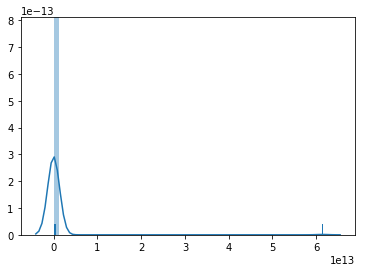

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
array1 = hbn["NLES_SR,NLES_SR_Upset_Avg"].as_matrix().astype(float)
array1 = array1[~np.isnan(array1)]
sns.distplot(array1, rug=True)
plt.show()

To fix: We just remove the column entirely

In [8]:
del hbn["NLES_SR,NLES_SR_Upset_Avg"]

### The DailyMeds,hours_sleep column has a few extreme outliers which may just be bad entries

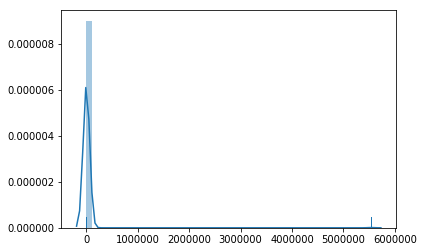

In [9]:
array1 = hbn["DailyMeds,hours_sleep"].as_matrix().astype(float)
array1 = array1[~np.isnan(array1)]
sns.distplot(array1, rug=True)
plt.show()

To fix: We just remove the column entirely

In [10]:
del hbn["DailyMeds,hours_sleep"]

### Many categorical variables are redundant with minor changes, e.g. 
* upper case vs. lower case
  * ADHD Inattentive Type vs. ADHD Inattentive type
* presence of hyphens
  * Attention Deficit Hyperactivity Disorder vs. Attention-Deficit Hyperactivity Disorder vs. Attention-Deficit/Hyperactivity Disorder vs. Attention-Deficit/Hyperactivity Disorder *with a space at the end*
* Including other special characters
  * Tourette's Disorder vs. Tourettes Disorder

In [11]:
array1 = hbn["ConsensusDx,DX_01"]
array1 = array1[[False if x is np.nan else True for x in array1]]
np.unique(array1)

array(['ADHD Inattentive Type', 'ADHD Inattentive type',
       'ADHD-Combined Type', 'ADHD-Hyperactive/Impulsive Type',
       'ADHD-Inattentive Type', 'Acute Stress Disorder',
       'Adjustment Disorder, with Mixed Emotions and Conduct',
       'Adjustment Disorders', 'Agoraphobia',
       'Attention Deficit Hyperactivity Disorder',
       'Attention Deficit Hyperactivity Disorder Combined Presentation',
       'Attention-Deficit Hyperactivity Disorder',
       'Attention-Deficit/Hyperactivity Disorder',
       'Attention-Deficit/Hyperactivity Disorder ',
       'Autism Spectrum Disorder', 'Bipolar I Disorder',
       'Bipolar II Disorder', 'Borderline Intellectual Functioning',
       'Cannabis Use Disorder', 'Conduct Disorder-Childhood-onset type',
       'Disruptive Mood Dysregulation Disorder', 'Enuresis',
       'Gender Dysphoria in Children', 'Generalized Anxiety Disorder',
       'Intellectual DIsability (moderate)',
       'Intellectual Disability-Mild', 'Intellectual Disabi

To fix:
1. If the categorical array is x = [s1, s2, ..., sn], Hash each string si to si', with the hash function removing all non alpha-numeric characters and making the entire string lower case
2. For each string si', replace all sj where sj' = si' with si 

In [12]:
import re
def stringhash(string):
    return re.sub(r'\W+', '', string).lower()
columns = np.array(list(map(stringhash, array1)))
for a, c in zip(array1, columns):
    array1[columns == c] = a
np.unique(array1)

array(['ADHD-Combined Type', 'ADHD-Hyperactive/Impulsive Type',
       'ADHD-Inattentive Type', 'Acute Stress Disorder',
       'Adjustment Disorder, with Mixed Emotions and Conduct',
       'Adjustment Disorders', 'Agoraphobia',
       'Attention Deficit Hyperactivity Disorder Combined Presentation',
       'Attention-Deficit/Hyperactivity Disorder ',
       'Autism Spectrum Disorder', 'Bipolar I Disorder',
       'Bipolar II Disorder', 'Borderline Intellectual Functioning',
       'Cannabis Use Disorder', 'Conduct Disorder-Childhood-onset type',
       'Disruptive Mood Dysregulation Disorder', 'Enuresis',
       'Gender Dysphoria in Children', 'Generalized Anxiety Disorder',
       'Intellectual Disability-Mild', 'Intellectual Disability-Moderate',
       'Intellectual Disability-Severe', 'Intermittent Explosive Disorder',
       'Language Disorder',
       'Learning Disorder with Impairment in Reading ',
       'Major Depressive Disorder', 'No Diagnosis Given',
       'Obsessive-Com

In [13]:
def convertDtype(l):
    try:
        return np.array(l, dtype="float")
    except:
        pass
    l = np.array(l, dtype=str)
    l[l == 'nan'] = 'NA'
    return l

# Find out the data type of each column
d = []
for c in hbn.columns:
    d.append(convertDtype(list(hbn[c])))
    #print("Converting", c, end="\r") 

# Make a new dataframe with the converted types
newcolumns = hbn.columns
newindex = hbn.index
D = list(d)
D = pd.DataFrame(dict(zip(newcolumns, D)))

# Determine which columns are categorical
keep = (D.dtypes == "float64").as_matrix()
cat = D.columns[~keep]

# Apply the string hash transform to each categorical column
for c in cat:
    array1 = D[c].as_matrix()
    columns = np.array(list(map(stringhash, array1)))
    for a, c in zip(array1, columns):
        array1[columns == c] = a
    D[c] = array1

In [14]:
np.unique(D["ConsensusDx,DX_01"])

array(['ADHD-Combined Type', 'ADHD-Hyperactive/Impulsive Type',
       'ADHD-Inattentive Type', 'Acute Stress Disorder',
       'Adjustment Disorder, with Mixed Emotions and Conduct',
       'Adjustment Disorders', 'Agoraphobia',
       'Attention Deficit Hyperactivity Disorder Combined Presentation',
       'Attention-Deficit/Hyperactivity Disorder ',
       'Autism Spectrum Disorder', 'Bipolar I Disorder',
       'Bipolar II Disorder', 'Borderline Intellectual Functioning',
       'Cannabis Use Disorder', 'Conduct Disorder-Childhood-onset type',
       'Disruptive Mood Dysregulation Disorder', 'Enuresis',
       'Gender Dysphoria in Children', 'Generalized Anxiety Disorder',
       'Intellectual Disability-Mild', 'Intellectual Disability-Moderate',
       'Intellectual Disability-Severe', 'Intermittent Explosive Disorder',
       'Language Disorder',
       'Learning Disorder with Impairment in Reading ',
       'Major Depressive Disorder', 'NA', 'No Diagnosis Given',
       'Obsessi

Now D contains the tidy dataset